Import Important libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as pt
import seaborn as sn

Load datasets

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')

Merge datasets to create customer profiles with transaction history

In [3]:
customer_transactions = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print(customer_transactions)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00630      C0031      P093  2024-10-08 23:58:14         2   
996        T00672      C0165      P044  2024-07-28 00:09:49         4   
997        T00711      C0165      P044  2024-06-11 15:51:14         4   
998        T00878      C0165      P044  2024-09-24 21:15:21         3   
999        T00157      C0169      P044  2024-11-09 09:07:36         2   

     TotalValue  Price_x     CustomerName         Region  SignupDate  \
0        300.68   300.68   Andrea Jenkins         E

Aggregate data to create customer-level profiles

In [4]:
customer_profiles = customer_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',       # Total revenue generated by the customer
    'Quantity': 'sum',         # Total quantity purchased by the customer
    'TransactionID': 'count',  # Number of transactions made
    'ProductID': 'nunique',    # Number of unique products purchased
}).reset_index()
print(customer_profiles)

    CustomerID  TotalValue  Quantity  TransactionID  ProductID
0        C0001     3354.52        12              5          5
1        C0002     1862.74        10              4          4
2        C0003     2725.38        14              4          4
3        C0004     5354.88        23              8          8
4        C0005     2034.24         7              3          3
..         ...         ...       ...            ...        ...
194      C0196     4982.88        12              4          3
195      C0197     1928.65         9              3          3
196      C0198      931.83         3              2          2
197      C0199     1979.28         9              4          4
198      C0200     4758.60        16              5          5

[199 rows x 5 columns]


Prepare data for clustering (exclude CustomerID for clustering)

In [5]:
features = customer_profiles.drop(columns=['CustomerID'])
print(features)

     TotalValue  Quantity  TransactionID  ProductID
0       3354.52        12              5          5
1       1862.74        10              4          4
2       2725.38        14              4          4
3       5354.88        23              8          8
4       2034.24         7              3          3
..          ...       ...            ...        ...
194     4982.88        12              4          3
195     1928.65         9              3          3
196      931.83         3              2          2
197     1979.28         9              4          4
198     4758.60        16              5          5

[199 rows x 4 columns]


Normalize features

In [6]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)
print(normalized_features)

[[-0.06170143 -0.12203296 -0.01145819  0.05004655]
 [-0.87774353 -0.44800021 -0.46749414 -0.42420409]
 [-0.40585722  0.20393428 -0.46749414 -0.42420409]
 [ 1.03254704  1.67078689  1.35664965  1.47279848]
 [-0.78392861 -0.93695108 -0.92353008 -0.89845473]
 [ 0.41587942 -0.12203296 -0.46749414 -0.42420409]
 [-0.48548229 -0.77396745 -0.92353008 -0.89845473]
 [ 0.43997044  1.18183602  2.26872154  2.42129976]
 [-1.40630171 -1.58888557 -0.92353008 -0.89845473]
 [-0.9571662  -0.12203296 -0.46749414 -0.42420409]
 [ 0.14369581  0.04095066 -0.01145819  0.05004655]
 [ 0.96492372  1.0188524   0.9006137   0.52429719]
 [ 1.38575064  0.85586877  0.9006137   0.99854783]
 [-1.72239508 -1.75186919 -1.83560198 -1.84695602]
 [-1.26353893 -1.42590195 -1.37956603 -1.37270538]
 [ 0.22269727 -0.44800021 -0.01145819  0.05004655]
 [ 0.70375173  1.34481964  1.35664965  1.47279848]
 [ 0.71908486  0.85586877 -0.01145819  0.05004655]
 [-0.70101045 -0.28501659  0.44457776  0.52429719]
 [-1.39212827 -1.58888557 -1.83

Apply KMeans clustering

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters if needed
clusters = kmeans.fit_predict(normalized_features)
print(clusters)

C:\Users\sahud\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sahud\anaconda3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 2 0 1 2 0 2 1 3 2 0 4 4 3 3 0 1 4 0 3 1 4 4 4 2 0 0 1 2 0 2 3 3 4 2 2 0
 0 4 2 1 2 2 2 1 4 4 0 4 2 4 2 4 1 0 0 4 3 1 3 2 2 3 0 1 2 4 1 0 0 2 0 2 2
 1 0 2 3 0 3 4 1 3 1 2 0 1 0 2 4 4 2 1 2 3 4 3 4 1 4 1 1 0 1 4 0 0 4 1 3 0
 2 1 4 2 0 0 0 2 2 2 4 3 4 0 4 0 3 2 3 2 2 0 0 0 4 0 4 4 3 1 2 1 3 1 2 4 4
 4 3 3 0 4 0 4 1 0 0 2 0 4 1 4 0 1 2 2 0 4 4 4 0 1 0 1 2 2 2 4 4 4 0 4 2 2
 0 1 0 0 0 2 0 4 4 0 2 3 2 4]


Add cluster labels to customer profiles

In [10]:
customer_profiles['Cluster'] = clusters

Calculate Davies-Bouldin Index

In [11]:
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9173957737455748


Reduce dimensionality for visualization using PCA

In [13]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(normalized_features)
print(pca_features)

[[-7.19684162e-02  9.26513780e-02]
 [-1.09889076e+00  3.36156943e-01]
 [-5.43136601e-01 -1.54055859e-01]
 [ 2.77529363e+00  1.65912151e-01]
 [-1.77392971e+00 -4.68387393e-02]
 [-3.15936827e-01 -6.79758673e-01]
 [-1.54880855e+00 -3.00917185e-01]
 [ 3.18856704e+00  1.55622563e+00]
 [-2.40154625e+00  5.53044876e-01]
 [-9.71611221e-01  3.20880861e-01]
 [ 1.08718747e-01 -9.36153428e-02]
 [ 1.70172325e+00 -2.99811022e-01]
 [ 2.05891482e+00 -3.32961943e-01]
 [-3.57915237e+00 -2.87393521e-02]
 [-2.72279805e+00 -1.19371946e-02]
 [-1.01365164e-01 -4.14536765e-02]
 [ 2.45307660e+00  4.78686760e-01]
 [ 7.96502098e-01 -6.95836841e-01]
 [ 1.21662461e-02  1.01950328e+00]
 [-3.33883588e+00 -3.06007733e-01]
 [ 2.29666415e+00  3.59455142e-01]
 [ 9.87603526e-01 -1.11197437e-01]
 [ 1.03654686e+00 -2.75375011e-01]
 [ 1.10847917e+00  7.59583220e-01]
 [-1.33539276e+00  5.18119905e-01]
 [-4.93181705e-01 -4.09261252e-01]
 [-7.50776098e-01 -1.61406187e-02]
 [ 2.76283500e+00 -9.28492951e-01]
 [-1.11897095e+00  3

Create a DataFrame for visualization

In [14]:
viz_data = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
viz_data['Cluster'] = customer_profiles['Cluster']
print(viz_data)

         PCA1      PCA2  Cluster
0   -0.071968  0.092651        0
1   -1.098891  0.336157        2
2   -0.543137 -0.154056        0
3    2.775294  0.165912        1
4   -1.773930 -0.046839        2
..        ...       ...      ...
194 -0.357469 -1.217827        0
195 -1.636306 -0.077902        2
196 -2.864346  0.114599        3
197 -1.151051  0.326276        2
198  0.625222 -0.613411        4

[199 rows x 3 columns]


Set plot style

In [16]:
sns=sn.set(style="whitegrid")
print(sns)

None


Plot the clusters

<Axes: xlabel='PCA1', ylabel='PCA2'>

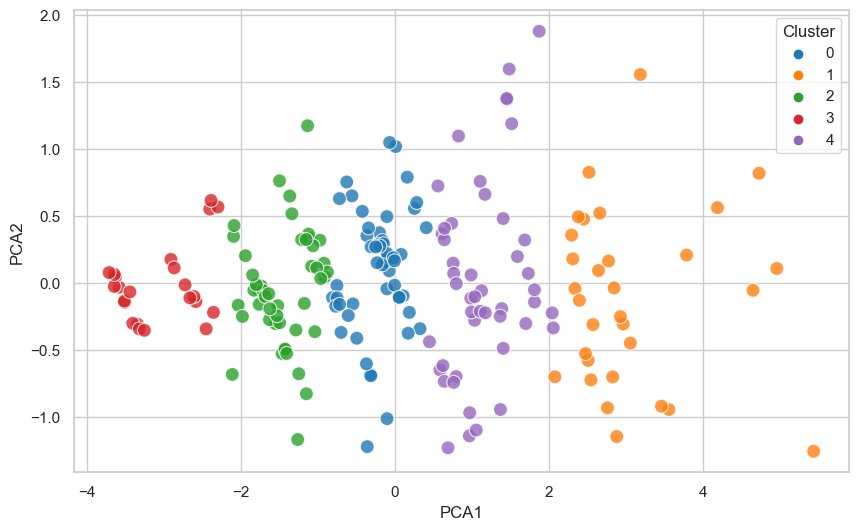

In [19]:
pt.figure(figsize=(10, 6))
sn.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    # palette='tab10', 
    data=viz_data, 
    s=100, 
    alpha=0.8
)

Add titles and labels

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


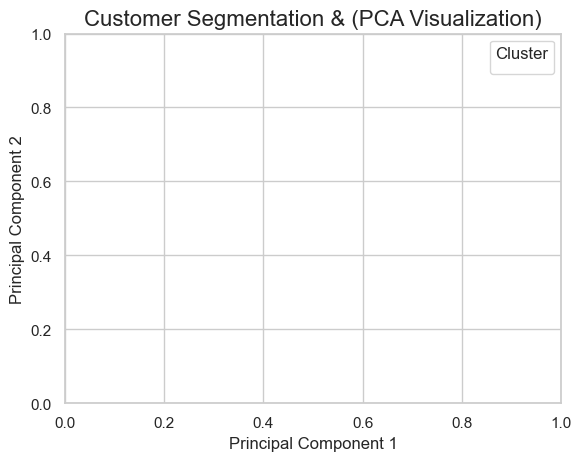

In [24]:
pt.title('Customer Segmentation & (PCA Visualization)', fontsize=16)
pt.xlabel('Principal Component 1', fontsize=12)
pt.ylabel('Principal Component 2', fontsize=12)
pt.legend(title='Cluster', loc='best', fontsize=10)
pt.show()